# Problem Statement

You work for an office transport company. You are in discussions with ABC Consulting company for 
providing transport for their employees. For this purpose, you are tasked with understanding how do the 
employees of ABC Consulting prefer to commute presently (between home and office). Based on the 
parameters like age, salary, work experience etc. given in the data set ‘Transport.csv’, you are required to 
predict the preferred mode of transport. The project requires you to build several Machine Learning 
models and compare them so that the model can be finalised.

Data Dictionary
Age : Age of the Employee in Years
Gender : Gender of the Employee
Engineer : For Engineer =1 , Non Engineer =0
MBA : For MBA =1 , Non MBA =0
Work Exp : Experience in years
Salary : Salary in Lakhs per Annum
Distance : Distance in Kms from Home to Office
license : If Employee has Driving Licence -1, If not, then 0
Transport : Mode of Transport
The objective is to build various Machine Learning models on this data set and based on the accuracy 
metrics decide which model is to be finalised for finally predicting the mode of transport chosen by the 
employee.

In [1]:
%matplotlib inline
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
import matplotlib.style
plt.style.use('classic')

In [2]:
#Reading the data
o1 = pd.read_csv('Cars (2).csv')

In [3]:
o1.head(5)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [4]:
o1.tail(5)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


In [5]:
o1.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

In [6]:
o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [7]:
o1.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [8]:
o1.shape

(444, 9)

In [9]:
o1.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,27.747748,0.754505,0.252252,6.299550,16.238739,11.323198,0.234234
std,4.416710,0.430866,0.434795,5.112098,10.453851,3.606149,0.423997
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000
25%,25.000000,1.000000,0.000000,3.000000,9.800000,8.800000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.600000,11.000000,0.000000
75%,30.000000,1.000000,1.000000,8.000000,15.725000,13.425000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000


In [10]:
for column in o1.columns:
    print(o1[column].unique())
    print(o1[column].value_counts())

[28 23 29 27 26 22 25 24 32 34 30 20 33 21 31 19 39 36 35 38 40 18 37 42
 43]
26    63
27    49
28    46
24    46
25    37
30    34
29    26
23    24
31    16
22    15
32    13
33    11
34    11
38     9
21     8
39     7
40     7
36     6
20     5
37     4
35     2
18     2
19     1
42     1
43     1
Name: Age, dtype: int64
['Male' 'Female']
Male      316
Female    128
Name: Gender, dtype: int64
[0 1]
1    335
0    109
Name: Engineer, dtype: int64
[0 1]
0    332
1    112
Name: MBA, dtype: int64
[ 4  7  5  3  1  2  9 13  6  8  0 11 10 19 16 12 21 17 14 18 15 20 22 24]
4     54
2     47
3     46
6     46
5     42
0     29
7     28
8     28
1     22
9     21
10    14
11    11
19    10
14     8
21     6
20     6
16     5
12     5
18     5
13     3
22     3
17     2
15     2
24     1
Name: Work Exp, dtype: int64
[14.3  8.3 13.4 12.3 14.4 10.5  7.5 13.5 11.5  8.5 15.5 16.5  8.6 11.4
 10.6 14.6  9.5 13.6  7.6 16.6 12.5 12.6  9.6  8.4 36.6 11.7  6.5 15.6
 21.7  7.7 13.7 15.4  8.7 12.4 21.6 14

In [11]:
o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [12]:
o1['Gender'] = o1['Gender'].astype('category')
o1['Transport'] = o1['Transport'].astype('category')

In [13]:
o1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        444 non-null    int64   
 1   Gender     444 non-null    category
 2   Engineer   444 non-null    int64   
 3   MBA        444 non-null    int64   
 4   Work Exp   444 non-null    int64   
 5   Salary     444 non-null    float64 
 6   Distance   444 non-null    float64 
 7   license    444 non-null    int64   
 8   Transport  444 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 25.5 KB


In [14]:
a1 = o1.select_dtypes(['object','category'])
a2 = o1.select_dtypes(['int64','float64'])

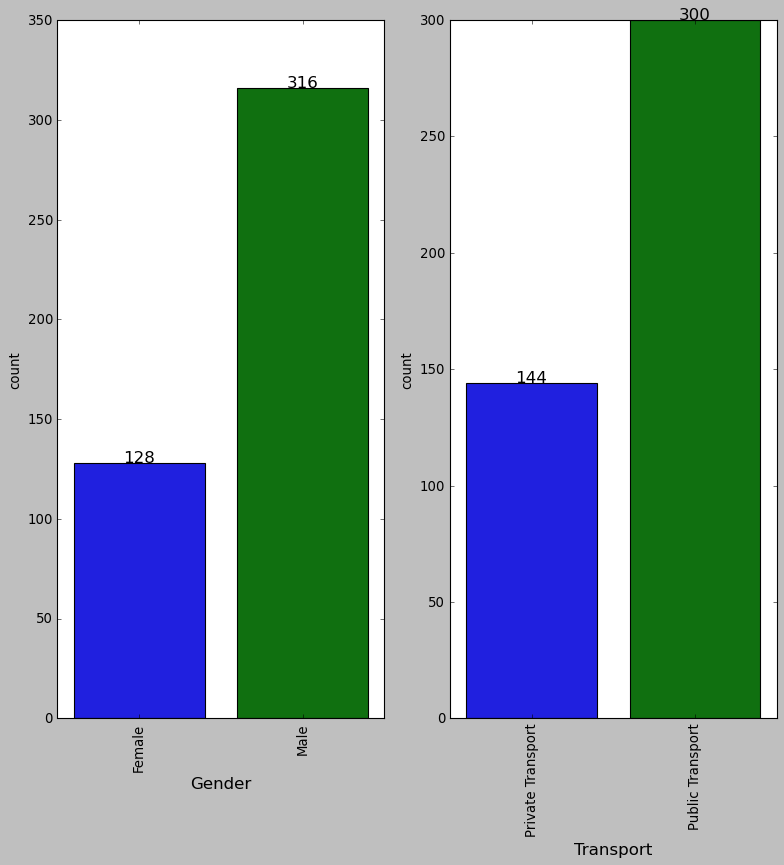

In [15]:
l1 = len(a1.columns)
n = 1
fig = plt.figure(figsize=(l1*5.8,l1*12))
for column in a1.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(column,fontsize =15)
    plt.xticks(rotation=90)
    ax1 = sns.countplot(a1[column])
    n = n + 1
    for q in ax1.patches:
        ax1.annotate(format(q.get_height()), (q.get_x() + q.get_width() / 2,
        q.get_height()), ha='center', va='center',
        xytext=(0, 5),
        textcoords='offset points',fontsize = 15)

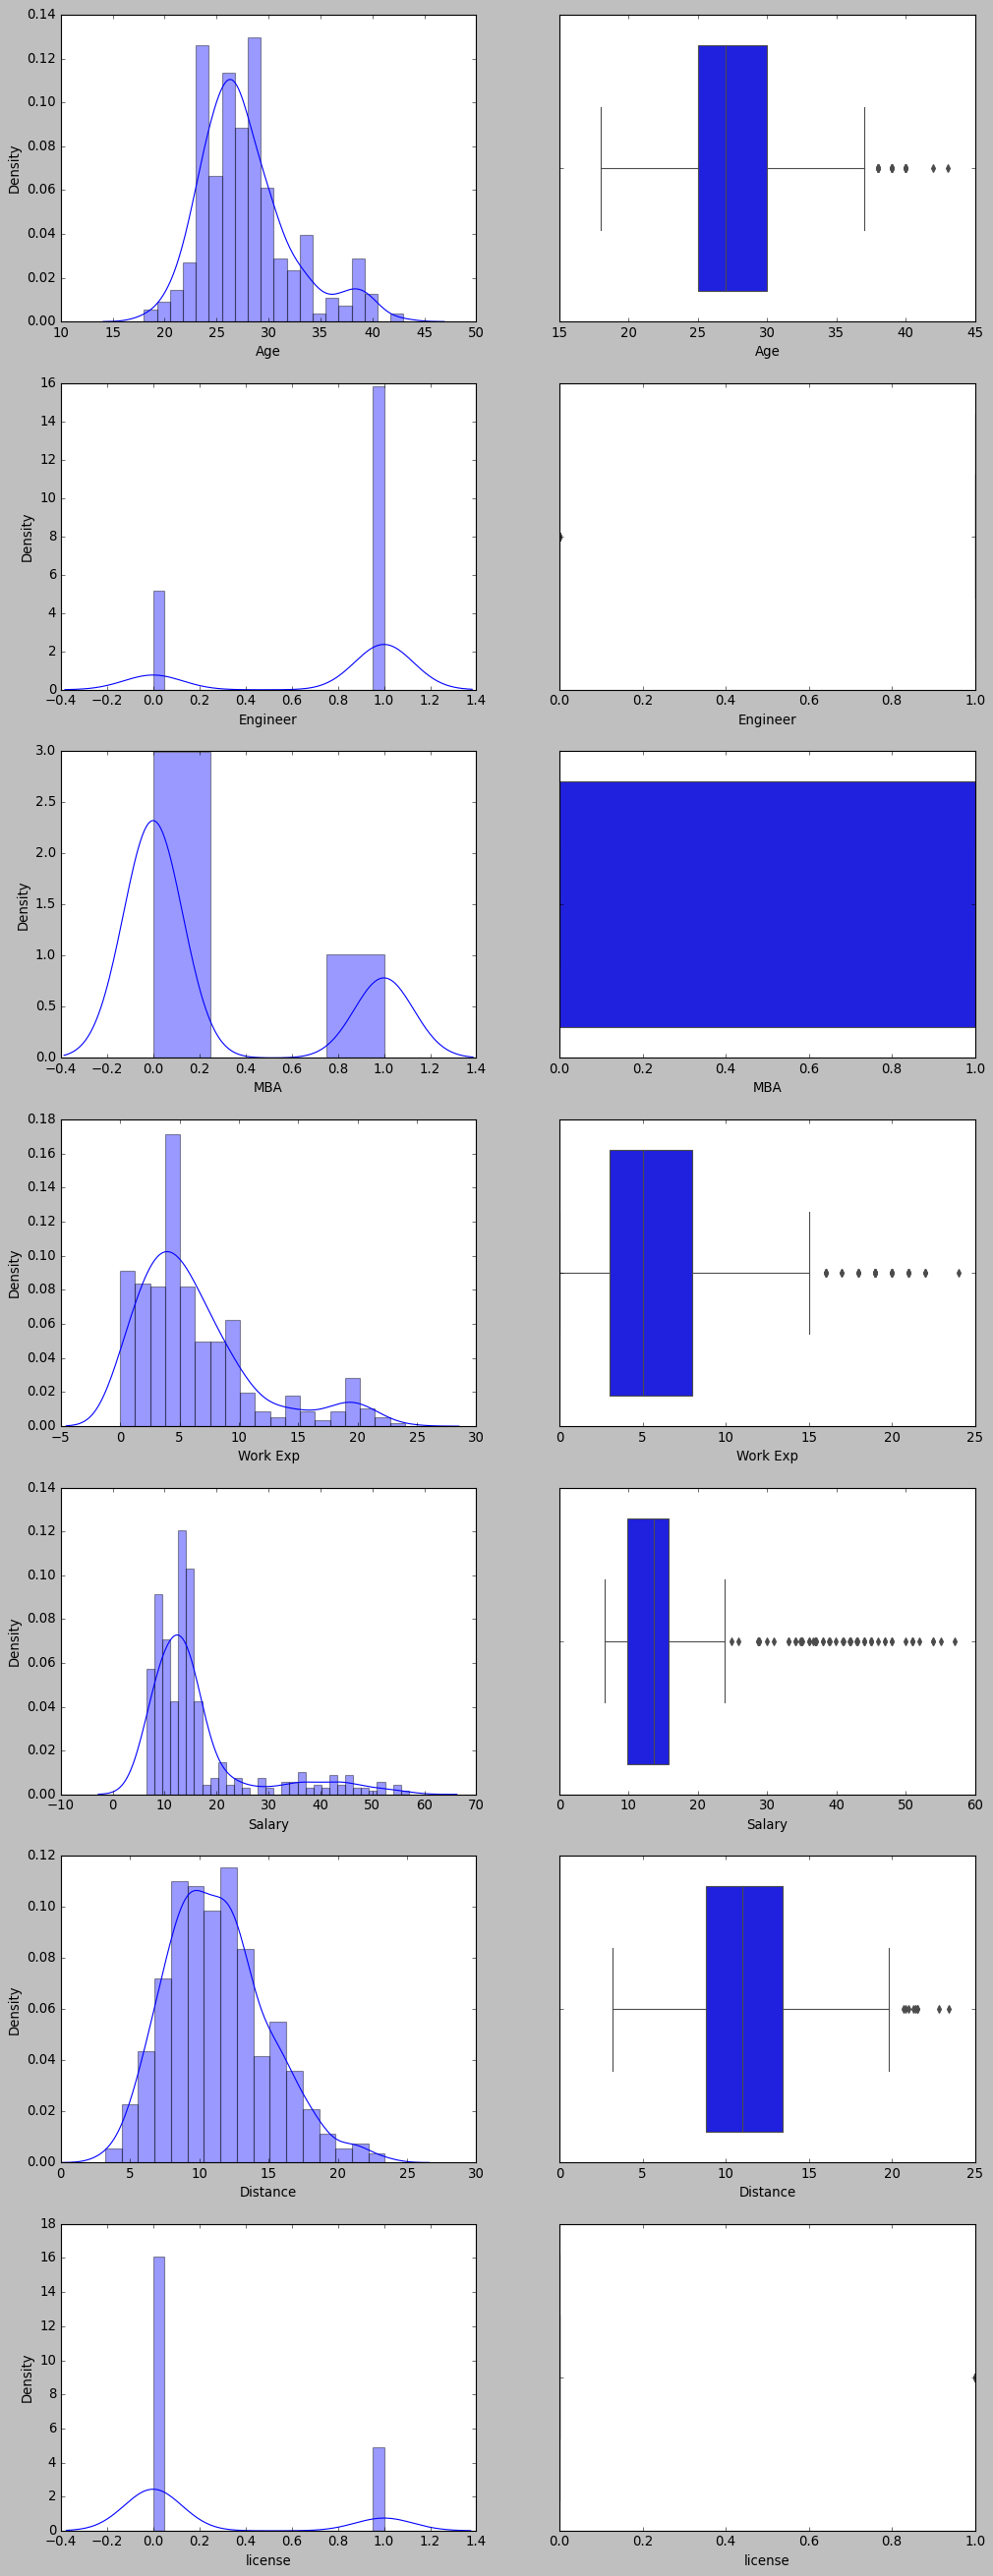

In [16]:
l2 = len(a2.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for column in a2.columns:
        plt.subplot(l2, 2, n)
        plt.xlabel(column)
        sns.distplot(a2[column], hist_kws= dict(ec = 'black'))
        n = n + 1
        plt.subplot(l2, 2, n)
        plt.xlabel(column)
        sns.boxplot(x = a2[column])
        n = n + 1

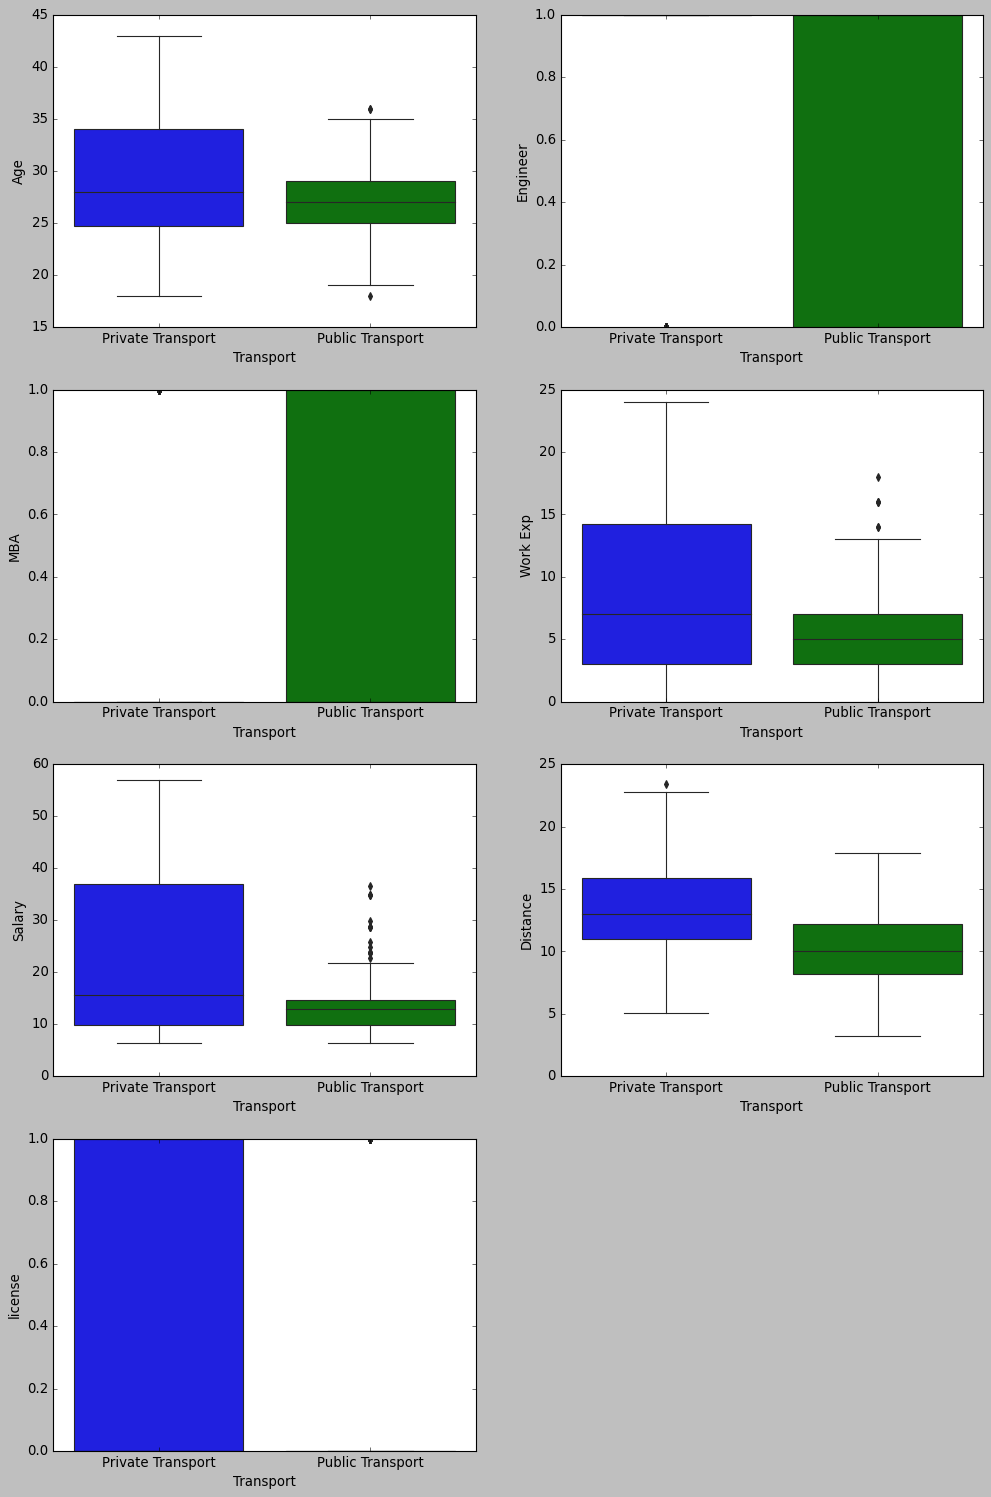

In [17]:
l1 = len(a2.columns)
n = 1
fig = plt.figure(figsize=(15,40))
for col in a2.columns:
    plt.subplot(l1, 2, n)
    plt.xlabel(col)
    sns.boxplot(x = o1['Transport'],y = a2[col])
    n = n + 1

In [18]:
o1.columns

Index(['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance',
       'license', 'Transport'],
      dtype='object')

<AxesSubplot:>

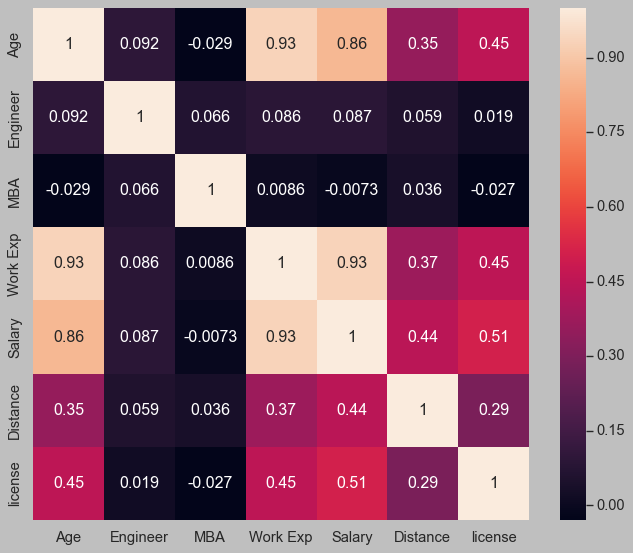

In [19]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(o1[['Age', 'Gender', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance','license', 'Transport']].corr(), annot=True)

In [20]:
o1['Gender_Male'] = np.where(o1['Gender']=='Male',1,0)

In [21]:
o1

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gender_Male
0,28,Male,0,0,4,14.3,3.2,0,Public Transport,1
1,23,Female,1,0,4,8.3,3.3,0,Public Transport,0
2,29,Male,1,0,7,13.4,4.1,0,Public Transport,1
3,28,Female,1,1,5,13.4,4.5,0,Public Transport,0
4,27,Male,1,0,4,13.4,4.6,0,Public Transport,1
...,...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport,1
440,38,Male,1,0,19,44.0,21.5,1,Private Transport,1
441,37,Male,1,0,19,45.0,21.5,1,Private Transport,1
442,37,Male,0,0,19,47.0,22.8,1,Private Transport,1


In [22]:
o1['Gender_Female'] = np.where(o1['Gender']=='Female',1,0)

In [23]:
o1

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gender_Male,Gender_Female
0,28,Male,0,0,4,14.3,3.2,0,Public Transport,1,0
1,23,Female,1,0,4,8.3,3.3,0,Public Transport,0,1
2,29,Male,1,0,7,13.4,4.1,0,Public Transport,1,0
3,28,Female,1,1,5,13.4,4.5,0,Public Transport,0,1
4,27,Male,1,0,4,13.4,4.6,0,Public Transport,1,0
...,...,...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport,1,0
440,38,Male,1,0,19,44.0,21.5,1,Private Transport,1,0
441,37,Male,1,0,19,45.0,21.5,1,Private Transport,1,0
442,37,Male,0,0,19,47.0,22.8,1,Private Transport,1,0


In [24]:
o2 = o1.drop(['Gender'],axis=1)

In [25]:
o2

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gender_Male,Gender_Female
0,28,0,0,4,14.3,3.2,0,Public Transport,1,0
1,23,1,0,4,8.3,3.3,0,Public Transport,0,1
2,29,1,0,7,13.4,4.1,0,Public Transport,1,0
3,28,1,1,5,13.4,4.5,0,Public Transport,0,1
4,27,1,0,4,13.4,4.6,0,Public Transport,1,0
...,...,...,...,...,...,...,...,...,...,...
439,40,1,0,20,57.0,21.4,1,Private Transport,1,0
440,38,1,0,19,44.0,21.5,1,Private Transport,1,0
441,37,1,0,19,45.0,21.5,1,Private Transport,1,0
442,37,0,0,19,47.0,22.8,1,Private Transport,1,0


In [28]:
o2['Transport'] = np.where(o2['Transport']=='Public Transport',1,0)

In [29]:
o2

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Transport,Gender_Male,Gender_Female
0,28,0,0,4,14.3,3.2,0,1,1,0
1,23,1,0,4,8.3,3.3,0,1,0,1
2,29,1,0,7,13.4,4.1,0,1,1,0
3,28,1,1,5,13.4,4.5,0,1,0,1
4,27,1,0,4,13.4,4.6,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
439,40,1,0,20,57.0,21.4,1,0,1,0
440,38,1,0,19,44.0,21.5,1,0,1,0
441,37,1,0,19,45.0,21.5,1,0,1,0
442,37,0,0,19,47.0,22.8,1,0,1,0


In [38]:
o2.dtypes

Age                int64
Engineer           int64
MBA                int64
Work Exp           int64
Salary           float64
Distance         float64
license            int64
Transport          int32
Gender_Male        int32
Gender_Female      int32
dtype: object

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [40]:
y = o2['Transport']
X = o2.drop('Transport',axis=1)

In [43]:
#The data is scaled using standard scalar
sc = StandardScaler()
X_fit = sc.fit_transform(X)
X = pd.DataFrame(X_fit,columns=X.columns)

In [44]:
#The data is scaled using standard scalar
sc = StandardScaler()
X_fit = sc.fit_transform(X)
X = pd.DataFrame(X_fit,columns=X.columns)